# IMPORT STANDARD PACKAGES

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Import Time Series Data: Global Superstore Data

In [2]:
# Read the CSV file, and view columns

store_data = pd.read_csv("Global+Superstore+Data.csv")
store_data.columns

Index(['Order Date', 'Segment', 'Market', 'Sales', 'Profit'], dtype='object')

In [3]:
# Viewing some records

store_data.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [4]:
# check for Data-types

store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [5]:
# Statistical summary of numerical columns

store_data.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [6]:
# Determine the no. of rows & columns

store_data.shape

(51290, 5)

# Data Preparation

In [7]:
# Check for unique values

store_data.nunique().sort_values()

Segment           3
Market            7
Order Date     1430
Sales         22995
Profit        24575
dtype: int64

In [8]:
# Check for null values

store_data.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

In [9]:
# Re-formatting ORDER DATE into YEAR-MONTH

store_data['Order Date'] = pd.to_datetime(store_data['Order Date'], format='%d-%m-%Y').dt.to_period('m')
store_data.head()

,Order Date,Segment,Market,Sales,Profit
0,2012-07,Consumer,US,2309.650,762.1845
1,2013-02,Corporate,APAC,3709.395,-288.7650
2,2013-10,Consumer,APAC,5175.171,919.9710
3,2013-01,Home Office,EU,2892.510,-96.5400
4,2013-11,Consumer,Africa,2832.960,311.5200


In [10]:
# Merging MARKET & SEGMENT columns 

store_data['Market_Segment']= store_data['Market']+'_' +store_data['Segment']
store_data.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,2012-07,Consumer,US,2309.650,762.1845,US_Consumer
1,2013-02,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,2013-10,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,2013-01,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,2013-11,Consumer,Africa,2832.960,311.5200,Africa_Consumer


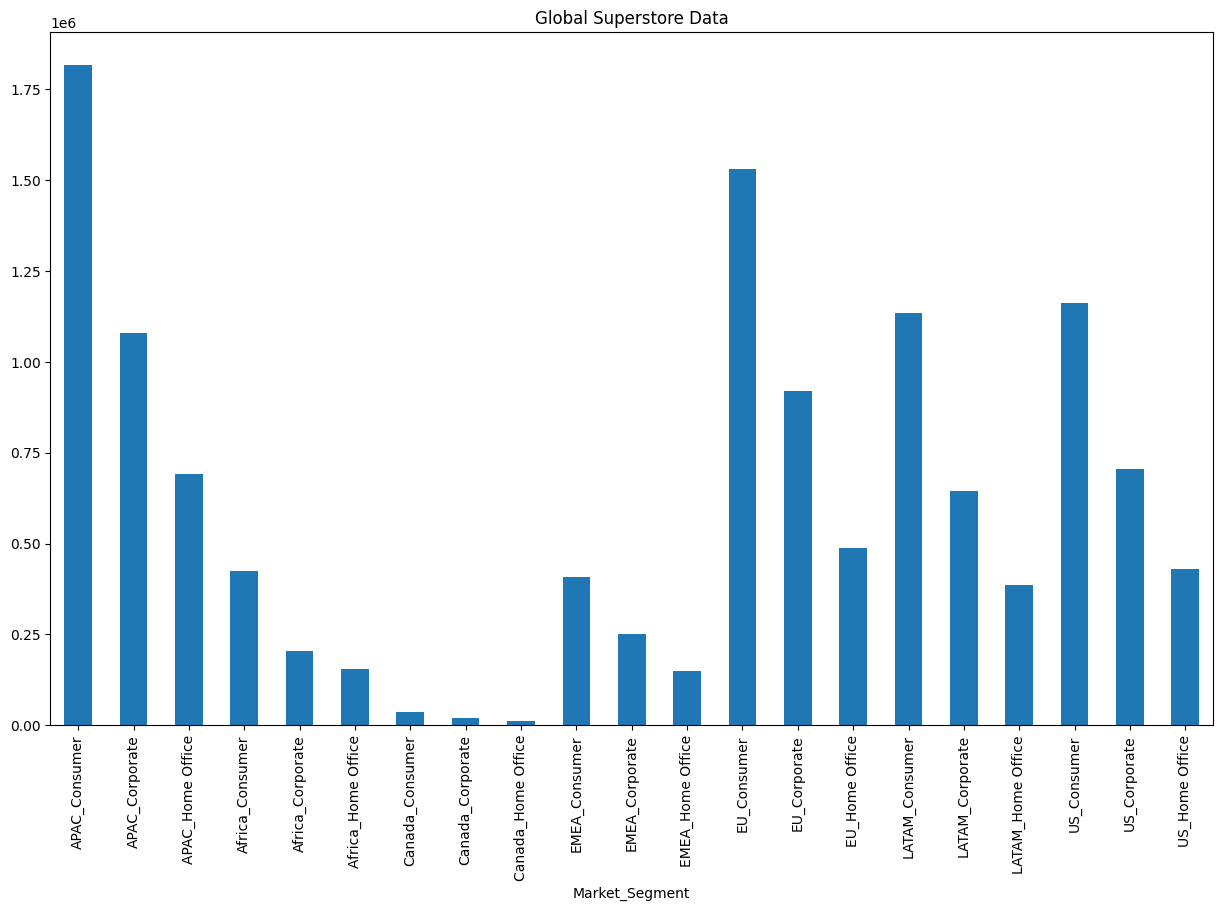

In [11]:
# Plotting Bar chart b/w Market_Segment & Sales

plt.figure(figsize=(15,9))
store_data.groupby(by='Market_Segment')['Sales'].sum().plot(kind='bar')
plt.title('Global Superstore Data')
plt.show()

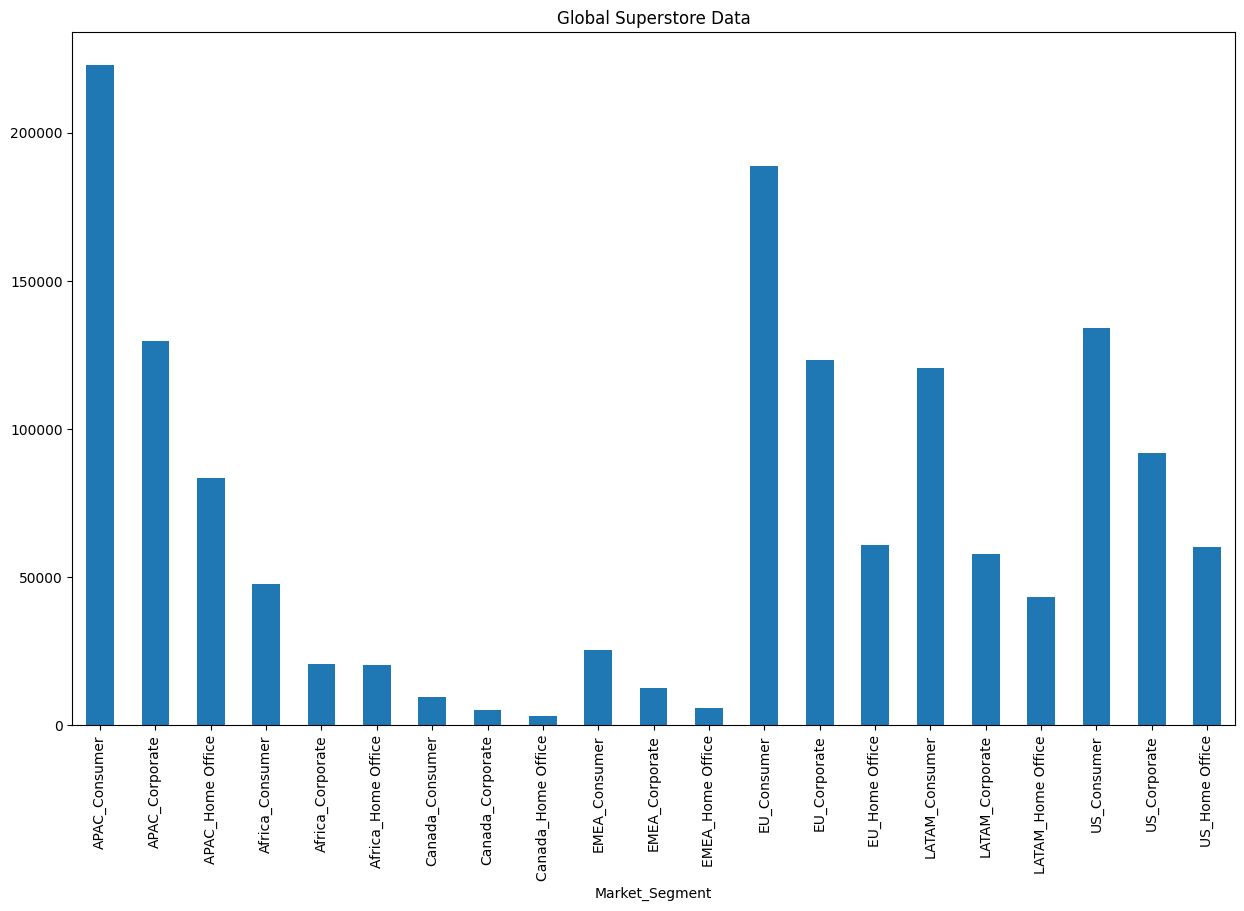

In [12]:
# Plotting Bar chart b/w Market_Segment & Profit

plt.figure(figsize=(15,9))
store_data.groupby(by='Market_Segment')['Profit'].sum().plot(kind='bar')
plt.title('Global Superstore Data')
plt.show()

# Creating Pivot Table

In [13]:
store_data_pt=store_data.pivot_table(index='Order Date', values='Profit', columns='Market_Segment', aggfunc='sum')
store_data_pt.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.360,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.041,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.223,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.858,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.102,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088


In [14]:
store_data_pt.shape

(48, 21)

# Splitting into Train and Test

In [15]:
# perform the train-test split such a way that it takes 42 months as the train data and the 6 months as the test data.

train_len=42

train=store_data_pt[:train_len]
test=store_data_pt[train_len:]

In [16]:
train.shape

(42, 21)

#  Calculating Coefficient of Variance (CoV)

Coefficient of Variation can be used as a metric to measure variability. 

The formula for CoV is : (𝝈/𝝁)

𝒘𝒉𝒆𝒓𝒆 𝝈 = 𝒔𝒕𝒂𝒏𝒅𝒂𝒓𝒅 𝒅𝒆𝒗𝒊𝒂𝒕𝒊𝒐𝒏 𝒂𝒏𝒅 𝝁 = 𝒎𝒆𝒂𝒏

Calculate the CoV on the profit for each of the 21 Market_Segments on the train data.

* To identify the most profitable market segment, we compare the variance between the segments using the coefficient of variation which will normalise the standard deviation with the mean and give a comparative figure
* We want to forecast the sales where the market segment is reliable. In simple words, segment which has less variation in the profits.

In [17]:
cov = pd.DataFrame(columns = ['Market_Segment', 'CoV'])
for i in store_data_pt.columns:
    var = {"Market_Segment": i, "CoV": np.std(train[i])/np.mean(train[i])}
    cov = cov.append(var, ignore_index=True)

cov.sort_values(by='CoV')

,Market_Segment,CoV
0,APAC_Consumer,0.596404
12,EU_Consumer,0.647485
15,LATAM_Consumer,0.680684
13,EU_Corporate,0.689346
1,APAC_Corporate,0.731926
16,LATAM_Corporate,0.880260
19,US_Corporate,1.027209
2,APAC_Home Office,1.048817
18,US_Consumer,1.095295
14,EU_Home Office,1.114681


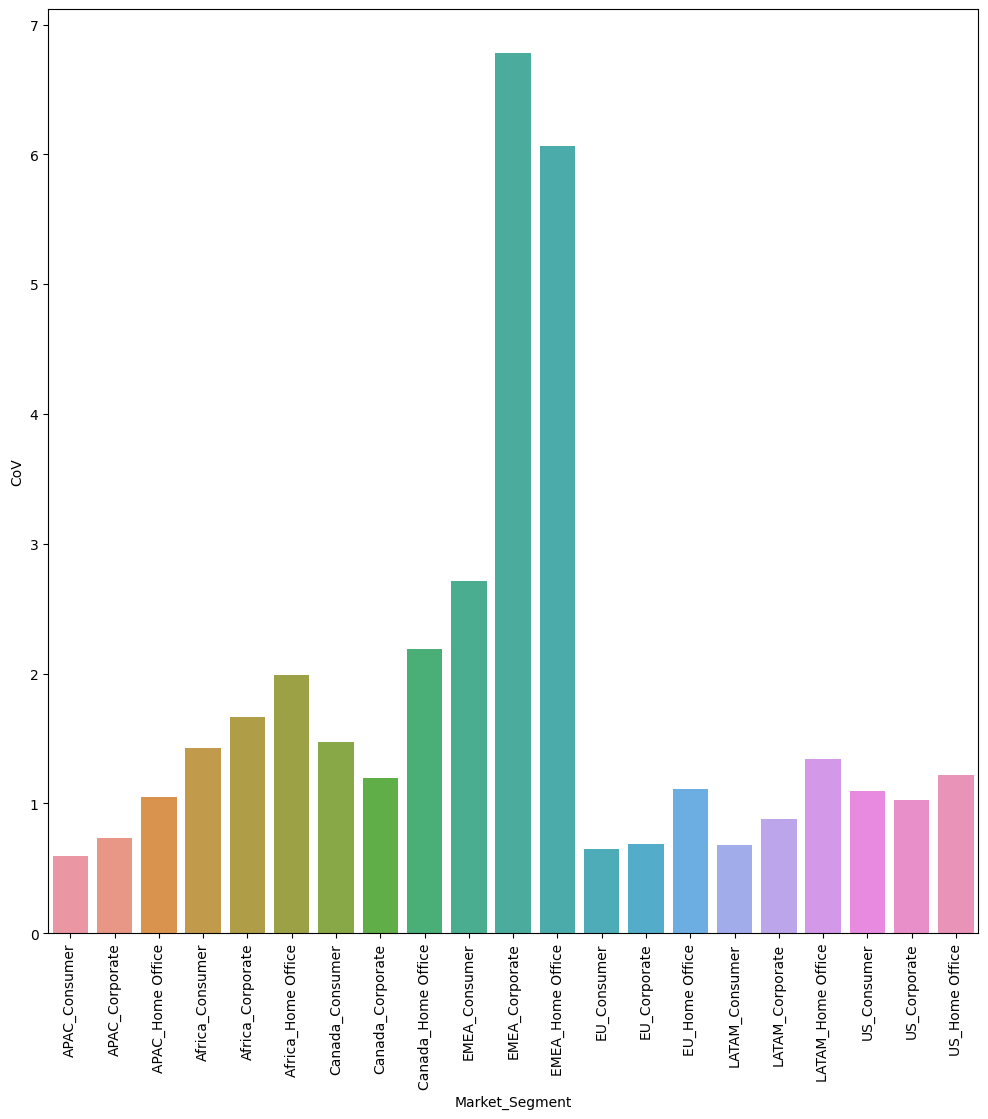

In [18]:
# Plotting Bar Plot b/w Market_Segment & CoV

plt.figure(figsize=(12,12))
sns.barplot(data=cov, x='Market_Segment', y='CoV')
plt.xticks(rotation=90)
plt.show()

In [19]:
store_data_final=store_data[store_data['Market_Segment']=='APAC_Consumer']
store_data_final.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
2,2013-10,Consumer,APAC,5175.171,919.971,APAC_Consumer
6,2011-11,Consumer,APAC,1822.080,564.840,APAC_Consumer
7,2012-04,Consumer,APAC,5244.840,996.480,APAC_Consumer
14,2013-06,Consumer,APAC,3701.520,1036.080,APAC_Consumer
29,2012-02,Consumer,APAC,1878.720,582.360,APAC_Consumer


In [20]:
# Dropping all the other columns except Order Date, Sales and Profit and setting order date as the index.

store_data_final.drop(columns=['Segment','Market','Market_Segment'], inplace=True)
store_data_final.set_index('Order Date')

,Sales,Profit
Order Date,,
2013-10,5175.1710,919.9710
2011-11,1822.0800,564.8400
2012-04,5244.8400,996.4800
2013-06,3701.5200,1036.0800
2012-02,1878.7200,582.3600
...,...,...
2013-01,38.9709,-32.3991
2014-11,6.9000,-0.8400
2011-11,17.2800,-13.9200


In [21]:
store_data_final=store_data_final.groupby(by='Order Date').sum()

In [22]:
store_data_final.shape

(48, 2)

# Plotting the data

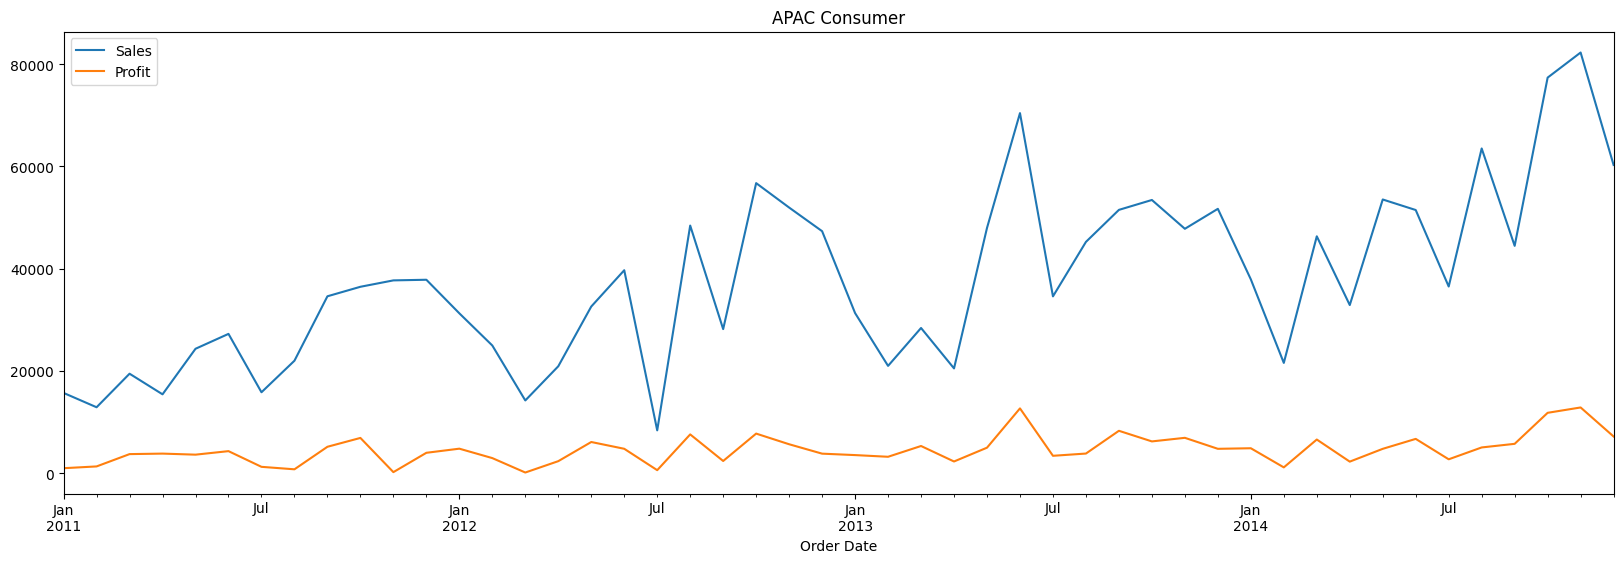

In [23]:
store_data_final.plot(figsize=(20,6))
plt.legend(loc='best')
plt.title('APAC Consumer')
plt.show()

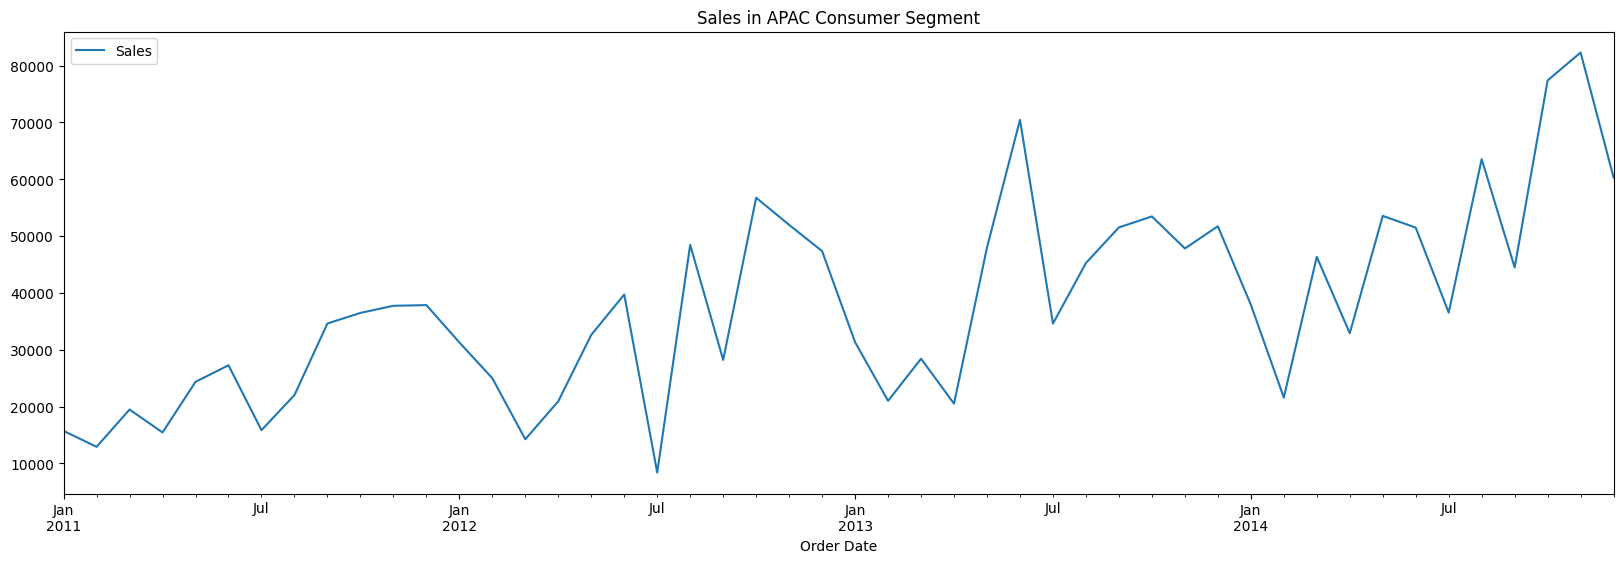

In [24]:
store_data_final['Sales'].plot(figsize=(20,6))
plt.legend(loc='best')
plt.title('Sales in APAC Consumer Segment')
plt.show()

# Time Series Decomposition 

# Additive seasonal decomposition

<function matplotlib.pyplot.show(close=None, block=None)>

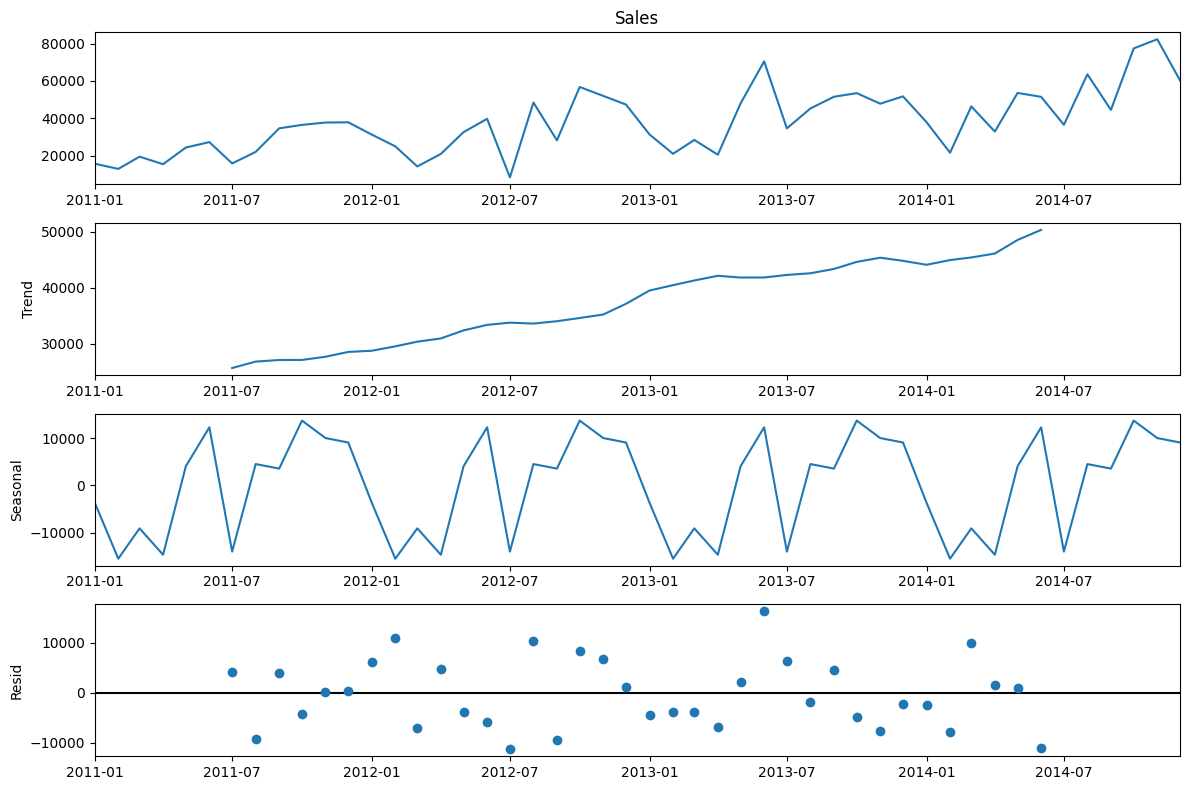

In [25]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize']= 12,8
store_data_final.Sales.interpolate(inplace = True)
store_data_final.Sales.index=store_data_final.Sales.index.to_timestamp()
decomposition = sm.tsa.seasonal_decompose(store_data_final.Sales, model='additive')
fig = decomposition.plot()
plt.show

# Multiplicative seasonal decomposition

<function matplotlib.pyplot.show(close=None, block=None)>

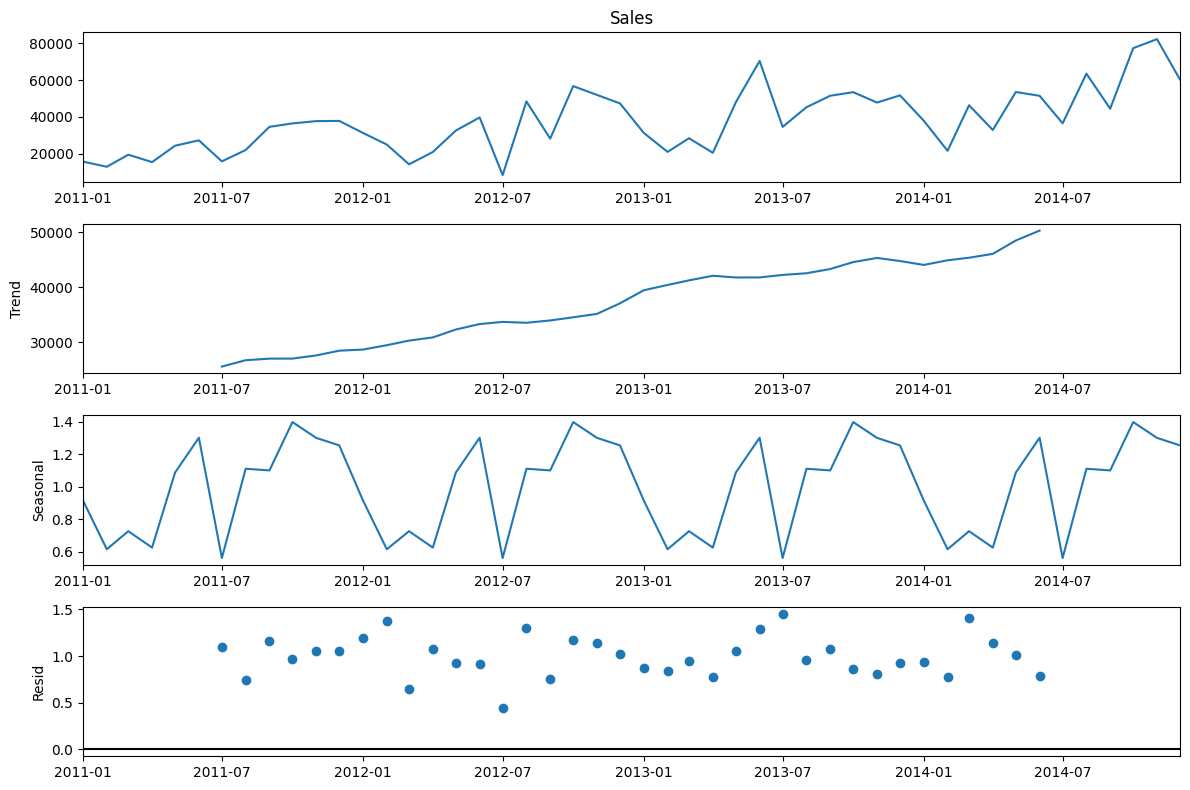

In [26]:
decomposition = sm.tsa.seasonal_decompose(store_data_final.Sales, model='multiplicative')
fig = decomposition.plot()
plt.show

In [27]:
#Converting datetime to timestamp

store_data_final = store_data_final.to_timestamp() 

# Train-Test Split

In [28]:
train=store_data_final[:train_len]
test=store_data_final[train_len:]

In [29]:
train.head()

,Sales,Profit
Order Date,,
2011-01-01,15711.7125,991.2825
2011-02-01,12910.8588,1338.8688
2011-03-01,19472.5632,3747.1632
2011-04-01,15440.3046,3846.4746
2011-05-01,24348.9723,3639.9423


# Building Models for Forecasting

## 1. NAIVE Method

In [30]:
y_hat_naive = test.copy()
y_hat_naive['Naive Forecast']=train['Sales'][train_len-1]

### Plot train, test and forecast

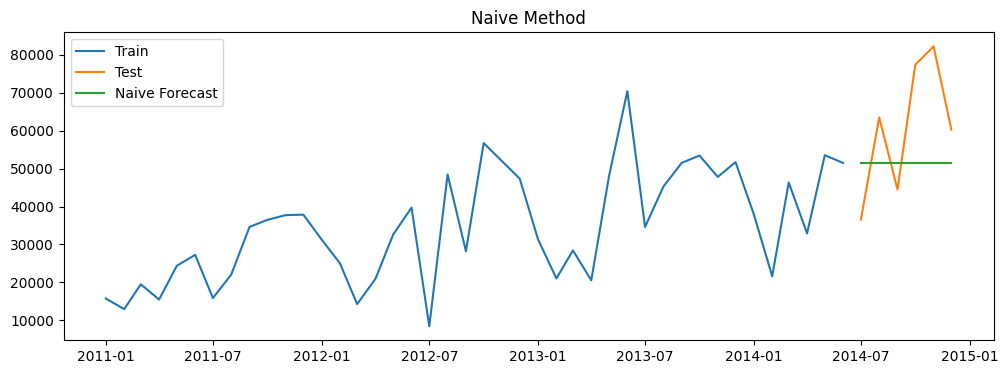

In [31]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['Naive Forecast'], label='Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

In [32]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['Naive Forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['Naive Forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86


## 2. Simple Average Method

In [33]:
y_hat_avg = test.copy()
y_hat_avg['Avg Forecast'] = train['Sales'].mean()

### Plot train, test and forecast

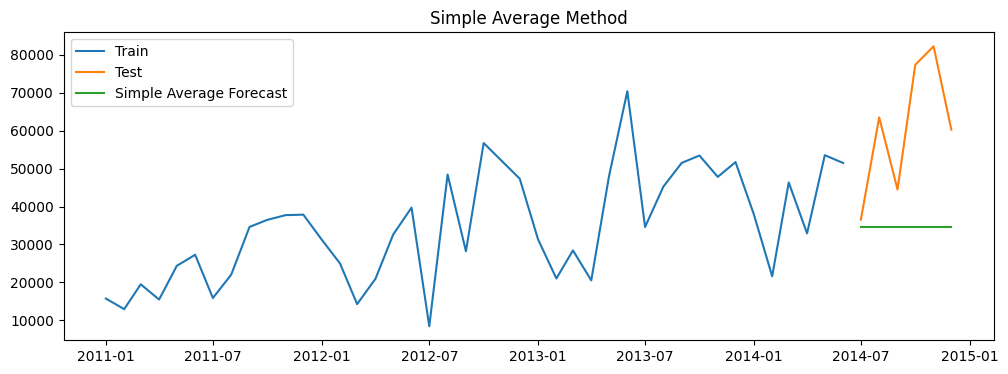

In [34]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['Avg Forecast'], label='Simple Average Forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculating RMSE and MAPE


In [35]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['Avg Forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['Avg Forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18


## 3. Simple Moving Average Method

In [36]:
y_hat_sma = store_data_final.copy()
ma_window = 12
y_hat_sma['SMA Forecast'] = store_data_final['Sales'].rolling(ma_window).mean()
y_hat_sma['SMA Forecast'][train_len:] = y_hat_sma['SMA Forecast'][train_len-1]

### Plot train, test and forecast

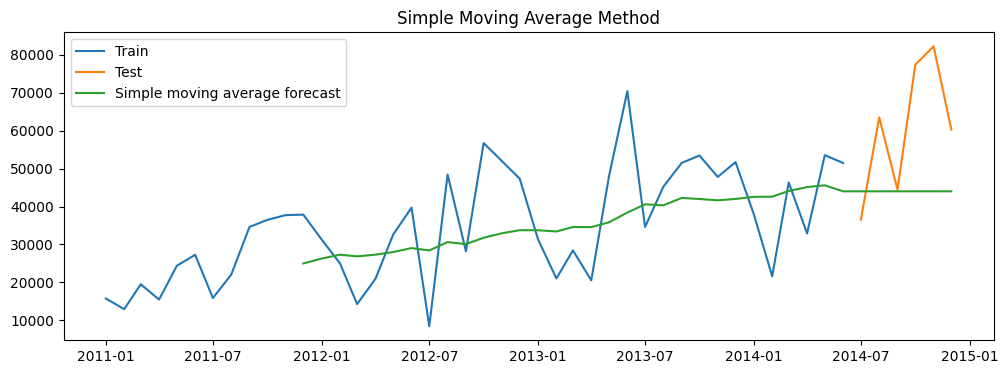

In [37]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['SMA Forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [38]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['SMA Forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['SMA Forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15


## 4. Exponential Smoothing Methods

### Simple Exponential Smoothing

In [39]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['SES_Forecast'] = model_fit.forecast(24)

### Plot train, test and forecast

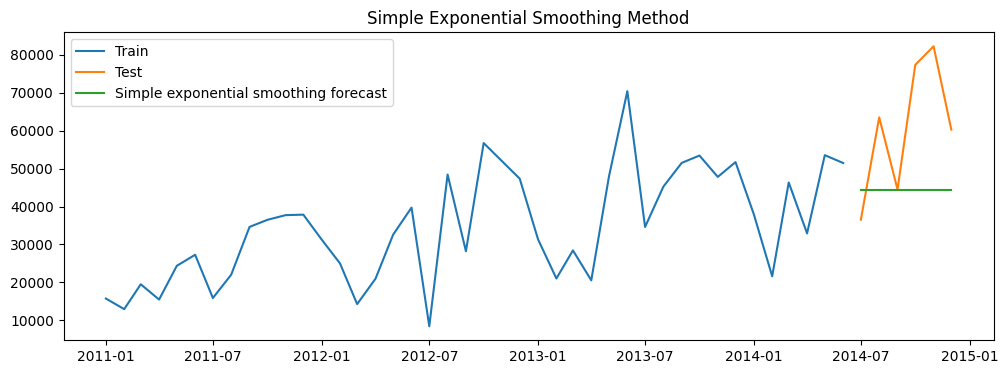

In [40]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['SES_Forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate RMSE and MAPE

In [41]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['SES_Forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['SES_Forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,23112.44,27.82


## 5. Holt's method with trend

In [42]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['Holt_Forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 10555.930159999994, 'initial_trend': 2155.007810909092, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

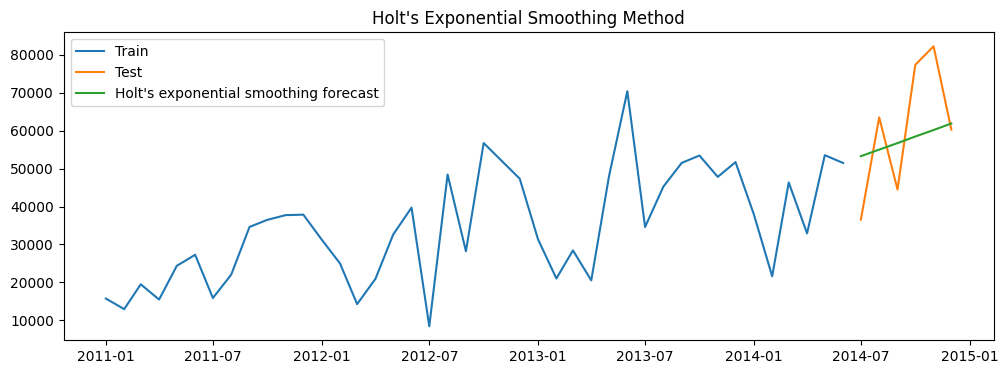

In [43]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['Holt_Forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate RSME and MAPE

In [44]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['Holt_Forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['Holt_Forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,23112.44,27.82
0,Holt's exponential smoothing method,15014.67,23.47


## 6.1 Holt Winters' Additive Method with Trend and Seasonality

In [45]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['HW_Forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.005, 'smoothing_trend': 0.005, 'smoothing_seasonal': 0.0001, 'damping_trend': nan, 'initial_level': 25191.878854999984, 'initial_trend': 549.1511154545474, 'initial_seasons': array([ -3046.57535417, -12233.28766042, -14734.34056667, -16050.40451667,
         2962.22100208,  17242.34903958, -17814.35478542,   4804.01762083,
          623.89353958,  15536.36958958,  13175.71666458,   9534.39542708]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\deept\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Plot train, test and forecast

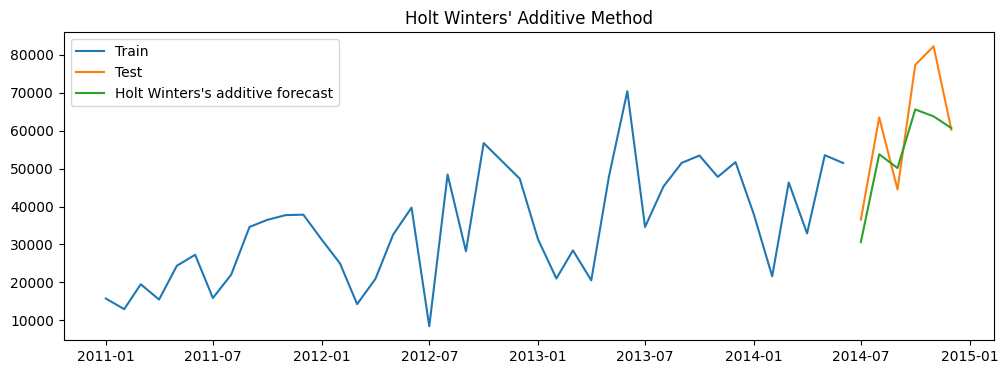

In [46]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['HW_Forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate RMSE and MAPE

In [47]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['HW_Forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['HW_Forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,23112.44,27.82
0,Holt's exponential smoothing method,15014.67,23.47
0,Holt Winters' additive method,10350.33,13.77


## 6.2 Holt Winter's Multiplicative Method with Trend and Seasonality

In [48]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['HW_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.005, 'smoothing_trend': 0.005, 'smoothing_seasonal': 0.07107142857142858, 'damping_trend': nan, 'initial_level': 25191.878854999984, 'initial_trend': 549.1511154545474, 'initial_seasons': array([0.93074061, 0.67529696, 0.57227633, 0.57532186, 1.06552983,
       1.42137084, 0.42860295, 1.11971051, 1.04228985, 1.47741289,
       1.40453147, 1.28691591]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\deept\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Plot train, test and forecast

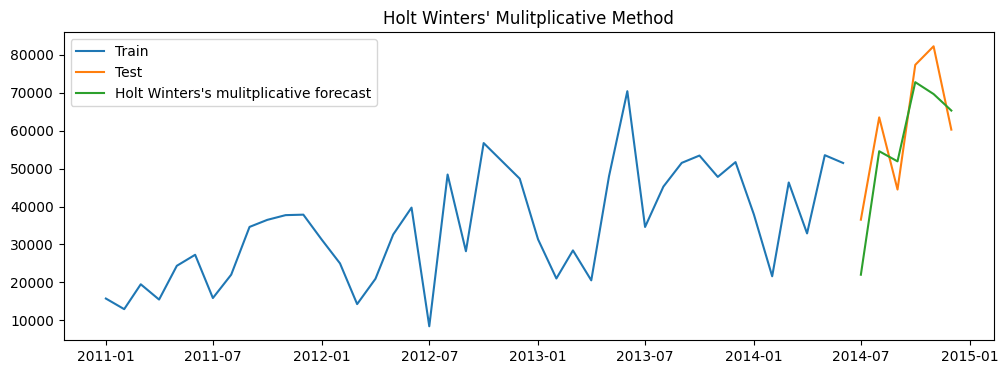

In [49]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['HW_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

### Calculate RMSE and MAPE

In [50]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['HW_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['HW_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,23112.44,27.82
0,Holt's exponential smoothing method,15014.67,23.47
0,Holt Winters' additive method,10350.33,13.77
0,Holt Winters' multiplicative method,9585.23,16.69


# Auto Regression Models

## 1. Stationarity vs non-stationary time series

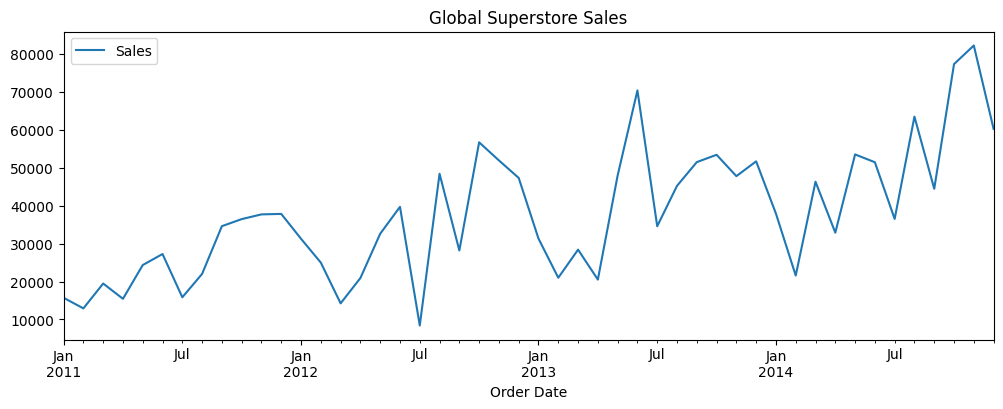

In [51]:
store_data_final['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Global Superstore Sales')
plt.show(block=False)

## 2. Augmented Dickey-Fuller (ADF) test

In [52]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(store_data_final['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -2.220857
Critical Values @ 0.05: -2.93
p-value: 0.198763


## 3. Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [53]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(store_data_final['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.940353
Critical Values @ 0.05: 0.46
p-value: 0.010000


C:\Users\deept\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## 4. Box Cox transformation to make variance constant

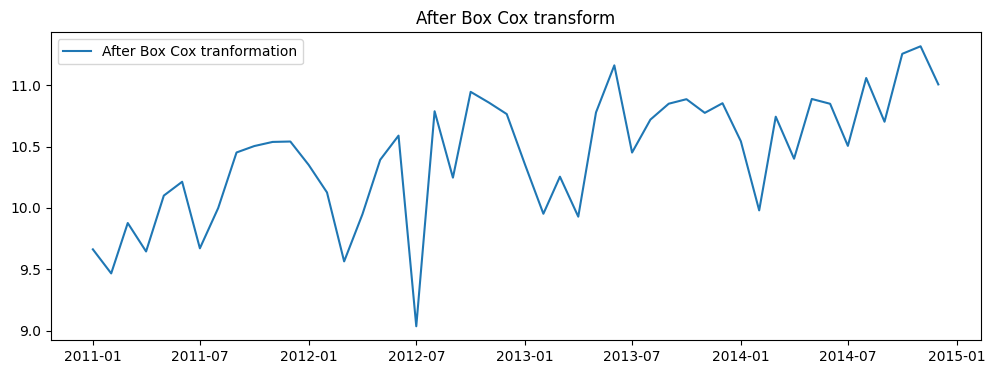

In [54]:
from scipy.stats import boxcox

data_boxcox = pd.Series(boxcox(store_data_final['Sales'], lmbda=0), index = store_data_final.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

## 5. Differencing to remove trend

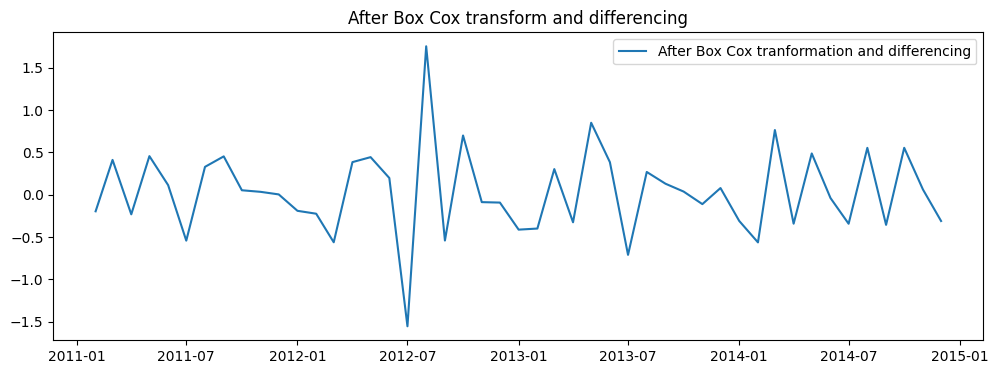

In [55]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), store_data_final.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [56]:
data_boxcox_diff.dropna(inplace=True)

In [57]:
data_boxcox_diff.tail()

Order Date
2014-08-01    0.553405
2014-09-01   -0.356405
2014-10-01    0.553748
2014-11-01    0.061479
2014-12-01   -0.311004
Freq: MS, Name: Sales, dtype: float64

In [58]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -5.769275
Critical Values @ 0.05: -2.95
p-value: 0.000001


## Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [59]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.094966
Critical Values @ 0.05: 0.46
p-value: 0.100000


C:\Users\deept\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


## Autocorrelation function (ACF)

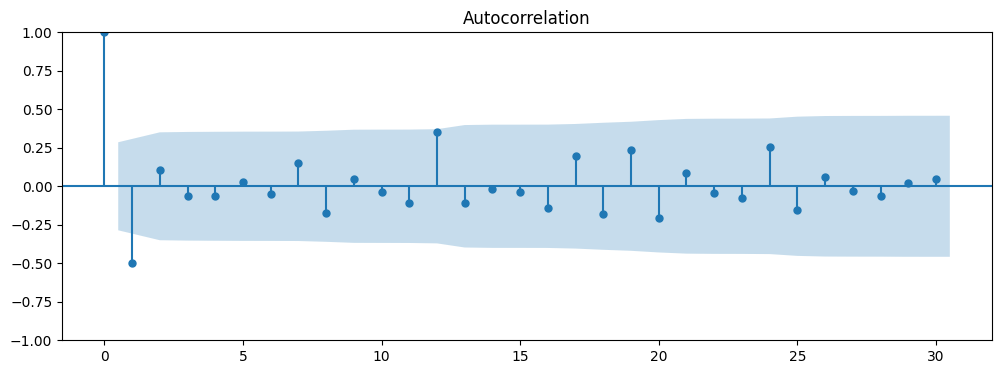

In [60]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

## Partial autocorrelation function (PACF)

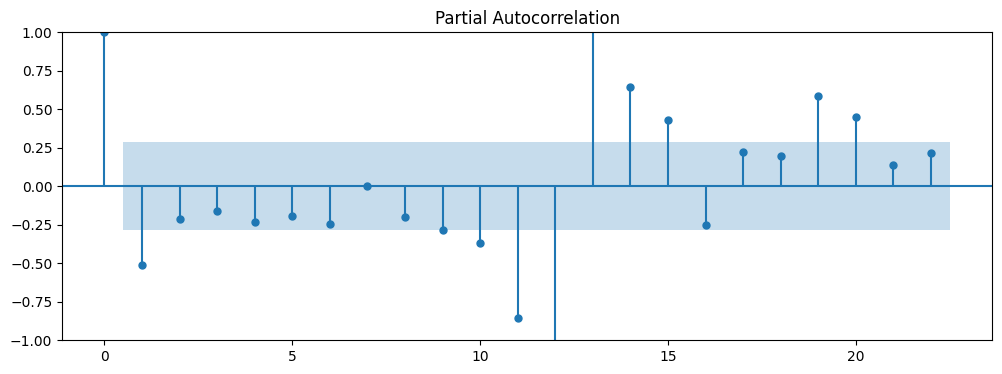

In [61]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 22)
plt.show()

In [62]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]

train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [63]:
train_data_boxcox_diff

Order Date
2011-02-01   -0.196338
2011-03-01    0.410938
2011-04-01   -0.232025
2011-05-01    0.455508
2011-06-01    0.112932
2011-07-01   -0.542704
2011-08-01    0.328881
2011-09-01    0.452636
2011-10-01    0.052311
2011-11-01    0.033713
2011-12-01    0.003292
2012-01-01   -0.190545
2012-02-01   -0.224703
2012-03-01   -0.562166
2012-04-01    0.384877
2012-05-01    0.443562
2012-06-01    0.197027
2012-07-01   -1.554595
2012-08-01    1.753416
2012-09-01   -0.541343
2012-10-01    0.699452
2012-11-01   -0.087925
2012-12-01   -0.093177
2013-01-01   -0.412912
2013-02-01   -0.400011
2013-03-01    0.302394
2013-04-01   -0.326054
2013-05-01    0.849926
2013-06-01    0.383940
2013-07-01   -0.710954
2013-08-01    0.268477
2013-09-01    0.129600
2013-10-01    0.036881
2013-11-01   -0.111427
2013-12-01    0.078506
2014-01-01   -0.310206
2014-02-01   -0.563617
2014-03-01    0.764032
2014-04-01   -0.342611
2014-05-01    0.487122
2014-06-01   -0.039254
Freq: MS, Name: Sales, dtype: float64

# Auto Regression Model

## 1. AR Model

In [64]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const     0.031315
ar.L1    -0.483974
sigma2    0.211971
dtype: float64


### Recover original time series

In [65]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train, test and forecast

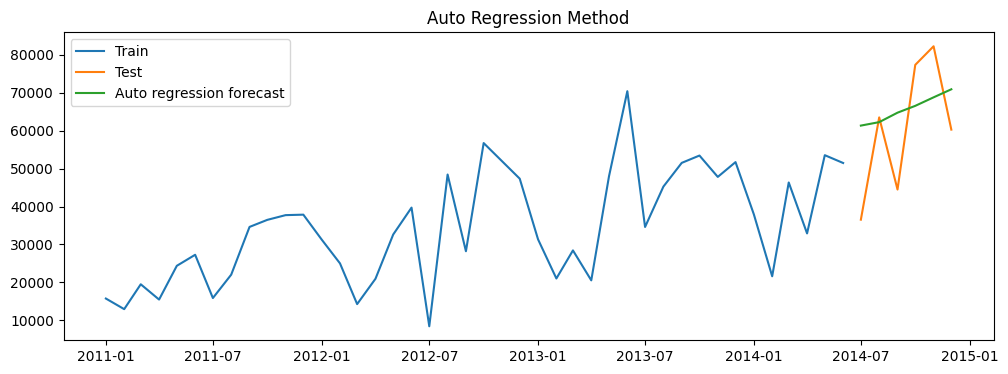

In [66]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

### Calculate RMSE and MAPE

In [67]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,23112.44,27.82
0,Holt's exponential smoothing method,15014.67,23.47
0,Holt Winters' additive method,10350.33,13.77
0,Holt Winters' multiplicative method,9585.23,16.69
0,Autoregressive (AR) method,15498.94,27.26


## 2. MA Model

In [68]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const     0.022689
ma.L1    -0.999630
sigma2    0.155059
dtype: float64


### Recover original time series

In [69]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train, test and forecast

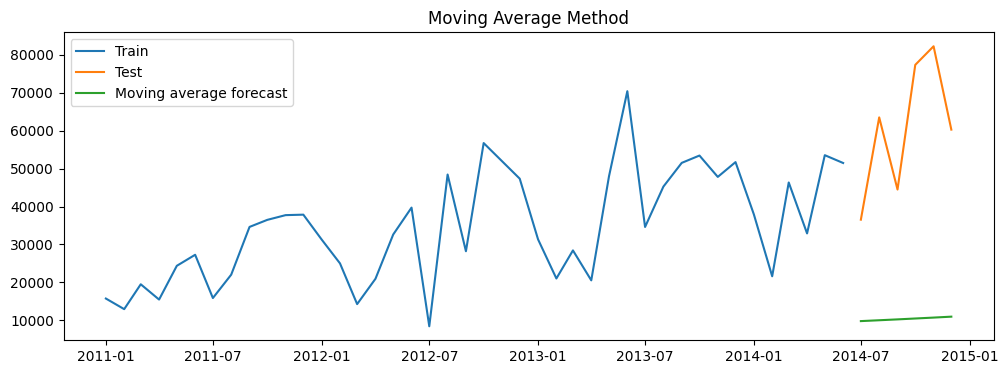

In [70]:
plt.figure(figsize=(12,4))
plt.plot(store_data_final['Sales'][:train_len], label='Train')
plt.plot(store_data_final['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [71]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,23112.44,27.82
0,Holt's exponential smoothing method,15014.67,23.47
0,Holt Winters' additive method,10350.33,13.77
0,Holt Winters' multiplicative method,9585.23,16.69
0,Autoregressive (AR) method,15498.94,27.26
0,Moving Average (MA) method,52917.91,81.67


## 3. ARMA Model

In [72]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const     0.022805
ar.L1     0.115921
ma.L1    -0.999970
sigma2    0.153802
dtype: float64


### Recover original time series

In [73]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train, test and forecast

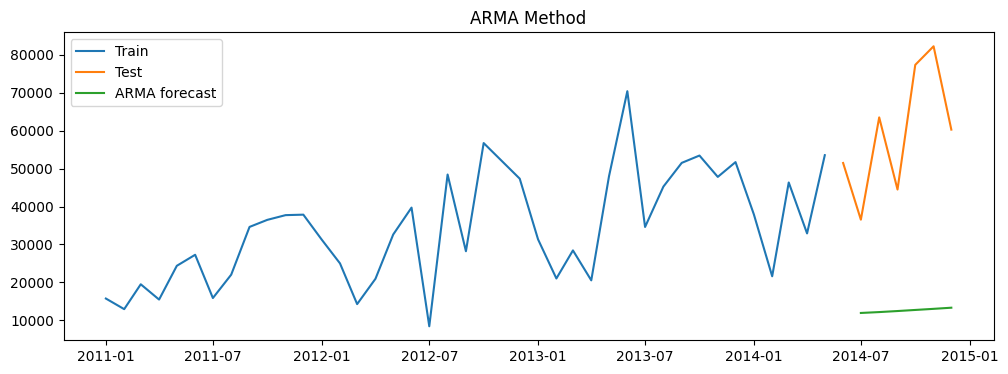

In [74]:
plt.figure(figsize=(12,4))
plt.plot(store_data_final['Sales'][:train_len-1], label='Train')
plt.plot(store_data_final['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

### Calculate RMSE and MAPE

In [75]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,23112.44,27.82
0,Holt's exponential smoothing method,15014.67,23.47
0,Holt Winters' additive method,10350.33,13.77
0,Holt Winters' multiplicative method,9585.23,16.69
0,Autoregressive (AR) method,15498.94,27.26
0,Moving Average (MA) method,52917.91,81.67
0,Autoregressive moving average (ARMA) method,50775.82,77.69


## 4. ARIMA

In [76]:
model = ARIMA(train_data_boxcox_diff, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

ar.L1    -0.471435
ma.L1    -0.999429
sigma2    0.217647
dtype: float64


C:\Users\deept\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Recover original time series forecast

In [77]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train, test and forecast

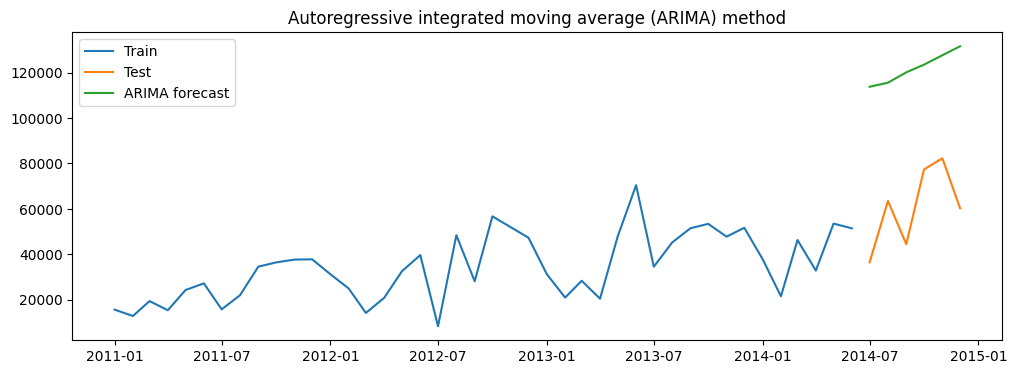

In [78]:
plt.figure(figsize=(12,4))
plt.plot(store_data_final['Sales'][:train_len], label='Train')
plt.plot(store_data_final['Sales'][train_len:], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

### Calculate RMSE and MAPE

In [79]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,23112.44,27.82
0,Holt's exponential smoothing method,15014.67,23.47
0,Holt Winters' additive method,10350.33,13.77
0,Holt Winters' multiplicative method,9585.23,16.69
0,Autoregressive (AR) method,15498.94,27.26
0,Moving Average (MA) method,52917.91,81.67
0,Autoregressive moving average (ARMA) method,50775.82,77.69


## 5. SARIMA Model

In [80]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.100411
ma.L1      -0.994890
ar.S.L12   -0.394847
ma.S.L12   -0.987787
sigma2      0.047300
dtype: float64


### Recover original time series forecast

In [81]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train, test and forecast

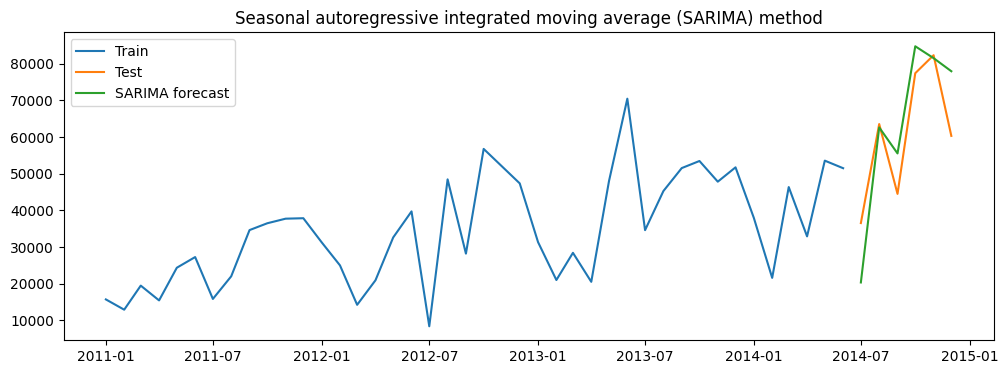

In [82]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

### Calculate RMSE and MAPE

In [83]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,23383.65,28.15
0,Simple exponential smoothing forecast,23112.44,27.82
0,Holt's exponential smoothing method,15014.67,23.47
0,Holt Winters' additive method,10350.33,13.77
0,Holt Winters' multiplicative method,9585.23,16.69
0,Autoregressive (AR) method,15498.94,27.26
0,Moving Average (MA) method,52917.91,81.67
0,Autoregressive moving average (ARMA) method,50775.82,77.69


## Conclusion

1. Out of all the methods of forecasting we observe that Holt Winter’s Additive Method, Holt Winter’s Multiplicative Method, and SARIMA Method have performed phenomenally well moreover this is inline with our expectations. On decomposing the plot, we had realized that the Sales have both trend and seasonality. Furthermore, both these methods Holt Winter’s and SARIMA can capture trend and seasonality unlike other models which can capture either of the two.

2. We also know that a time series of Sales data may have some sort of seasonality attached to it as Sales of any item will not remain same throughout the given period, i.e. a year. It may also have either positive or negative trend associated with it. As a result of this Holt Winter’s Models and SARIMA model are the best fitting for Sales forecasting. If an external factor is impacting the sale at some intervals than SARIMAX Model can also be used for analysis and forecasting Sales.